# Hand-in Exercise on Kinematics and Dynamics
### Ludvig Lindholm, 2025-10, lu2166li-s

Kinematics exercise link: https://canvas.education.lu.se/courses/37285/assignments/257751



In [1]:
import numpy as np
from sympy import Matrix, Symbol, cos, sin, pi

## Exercise 1
a)

In [2]:
o_0 = Matrix(np.eye(3))
o_0  # Column 1 is e_1, col 2 is e_2, col 3 is e_3 as given in the exercise

Matrix([
[1.0, 0.0, 0.0],
[0.0, 1.0, 0.0],
[0.0, 0.0, 1.0]])

In [3]:
# Rotate around y by alpha
a = Symbol('alpha')

rotation = Matrix([
    [cos(a), 0, sin(a)],
    [0, 1, 0],
    [-sin(a), 0, cos(a)]
]
)

o_0 @ rotation  # O_0 converted to O_1 by rotating around y by alpha. e_1 transformed to O_1 is the first column, e_2 the second etc.

Matrix([
[ 1.0*cos(alpha),   0, 1.0*sin(alpha)],
[              0, 1.0,              0],
[-1.0*sin(alpha),   0, 1.0*cos(alpha)]])

b) Here is the rotation matrix for a rotation around y by alpha

In [4]:
rotation  # 1b

Matrix([
[ cos(alpha), 0, sin(alpha)],
[          0, 1,          0],
[-sin(alpha), 0, cos(alpha)]])

c) Now we want to let alpha be pi/4 and look at the resulting matrix to validate correctness

In [5]:
# alfa pi/4 is 45 degrees, so each transformed axis should have size sqrt(2)/2 which we can see is true.
(o_0 @ rotation).subs({a: pi / 4})

Matrix([
[ 0.5*sqrt(2),   0, 0.5*sqrt(2)],
[           0, 1.0,           0],
[-0.5*sqrt(2),   0, 0.5*sqrt(2)]])

d)

No it is not possible to rotate AND translate O_1 in space from O_0 by 1 unit along y using only a 3x3 matrix. We would need a 4x4 transformation matrix to do that.

This would also require our O_0 matrix to be 4x4 with the last column being the translation vector [tx, ty, tz, 1]
The first 3x3 part of the matrix would then be the rotation matrix.

A translation matrix which does that would look like this:

In [6]:
# The matrix would look like this:
transformation = Matrix([
    # Both rotate and translate 1 unit along y, the translation is seen in the last column, 0 x translation, 1 y translation, 0 z translation
    [cos(a), 0, sin(a), 0],
    [0, 1, 0, 1],
    [-sin(a), 0, cos(a), 0],
    [0, 0, 0, 1]]
)
transformation

Matrix([
[ cos(alpha), 0, sin(alpha), 0],
[          0, 1,          0, 1],
[-sin(alpha), 0, cos(alpha), 0],
[          0, 0,          0, 1]])

In [7]:
# And applying it to a point in O_0 when alpha = pi/4
(Matrix(np.eye(4)) @ transformation).subs({a: pi / 4})

Matrix([
[ 0.5*sqrt(2),   0, 0.5*sqrt(2),   0],
[           0, 1.0,           0, 1.0],
[-0.5*sqrt(2),   0, 0.5*sqrt(2),   0],
[           0,   0,           0, 1.0]])

## Exercise 2
a)

Find the DH parameters for the coordinate frames:




d offset along previous z to the common normal
θ angle about previous z from old to new x
r length of the common normal
a (alfa) angle about common normal from old z to new z

z0 frame, x_0 positive, y_0 negative
z1 frame, x_1 positive, y_1 negative, l1 y space away from z0
z2 frame, x_2 positive, y_2 positive, l2 y space away from z0

Using x as common normal, according to the image theta_1 and theta_2 are both 0.
| Link | d | a  | r  | θ (theta)  |
|:------|:-:|:--:|:--:|:-----------:|
| z₁    | 0 | 0  | l₁ | θ₁          |
| z₂    | 0 | -π | l₂ | θ₂          |


2b)

T_x_y = Z_(x-1) @ X_n

In [8]:
l1, l2 = Symbol("l1"), Symbol("l2")  # The lengths, in our case always 1
trans0 = Matrix(  # Identity transformation which does nothing
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

trans1 = Matrix(  # Move the frame l1
    [
        [1, 0, 0, l1],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

rot_1_0 = Matrix(  # No rotation between 0 and 1
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

T_0_to_1 = trans1 @ rot_1_0  # First move then rotate

trans2 = Matrix( # Move the frame l2 in x direction
    [
        [1, 0, 0, l2],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ]
)

a_n = Symbol("alpha_n")  #  Will be valued at -pi but keeping symbolic for clarity
# Rotating -pi around x
rot_2_1 = Matrix( # Rotate around x by alpha_n which is -pi in our case
    [
        [1, 0, 0, 0],
        [0, cos(a_n), -sin(a_n), 0],
        [0, sin(a_n), cos(a_n), 0],
        [0, 0, 0, 1]
    ]
)
T_1_to_2 = trans2 @ rot_2_1
T_0_to_2 = T_0_to_1 @ T_1_to_2 # Combine the two transforms to get from 0 to 2

T_0_to_2

Matrix([
[1,            0,             0, l1 + l2],
[0, cos(alpha_n), -sin(alpha_n),       0],
[0, sin(alpha_n),  cos(alpha_n),       0],
[0,            0,             0,       1]])

In [9]:
vals_2 = {l1: 1, l2: 1, a_n: -pi}
T_0_to_1.subs(vals_2)

Matrix([
[1, 0, 0, 1],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [10]:
T_0_to_2.subs(vals_2)

Matrix([
[1,  0,  0, 2],
[0, -1,  0, 0],
[0,  0, -1, 0],
[0,  0,  0, 1]])

In [11]:
# We now must get T_2_to_1, it is logical that T_2_to_1 should be the inverse of T_1_to_2
T_2_to_1 = T_1_to_2.inv()
T_2_to_1  # This can be seen to be correct as the dx now is correct and the rotation matrix is also

Matrix([
[1,                                              0,            0, -l2],
[0, -sin(alpha_n)**2/cos(alpha_n) + 1/cos(alpha_n), sin(alpha_n),   0],
[0,                                  -sin(alpha_n), cos(alpha_n),   0],
[0,                                              0,            0,   1]])

In [12]:
T_2_to_1.subs(vals_2)

Matrix([
[1,  0,  0, -1],
[0, -1,  0,  0],
[0,  0, -1,  0],
[0,  0,  0,  1]])

2c) Explain the difference between a homogeneous transformation matrix and a rotation matrix.

Answer:
    The difference between a homogeneous transformation matrix and a rotation matrix is that a rotation matrix only rotates the frame but does not displace it linearly which a transformation matrix can do.
    Combining them into one matrix makes it easy for us to both rotate and translate a frame in one operation.

## Exercise 3

3a)

In [13]:
l = Symbol("l")  # All 3 links have this length
# We start with finding all the transform matrices

T1 = Matrix([
    [1, 0, l],
    [0, 1, 0],
    [0, 0, 1],
])
T3 = T2 = T1  # All have the same link lengths

# I will see the first joint as rotating around z and the rest around x
theta1, theta2, theta3 = Symbol("t_1"), Symbol("t_2"), Symbol("t_3")
rot1 = Matrix([
    [cos(theta1), -sin(theta1), 0],
    [sin(theta1), cos(theta1), 0],
    [0, 0, 1],
])

rot2 = Matrix([
    [cos(theta2), -sin(theta2), 0],
    [sin(theta2), cos(theta2), 0],
    [0, 0, 1],
])

rot3 = Matrix([
    [cos(theta3), -sin(theta3), 0],
    [sin(theta3), cos(theta3), 0],
    [0, 0, 1],
])
T0_3 = Matrix((((Matrix(np.eye(3)) @ rot1 @ T1) @ (rot2 @ T2)) @ (rot3 @ T3)))
T0_3.simplify()  # The function from angle to position for x is given from column 3 row 1 in the matrix, and for y in col 3 row 2.
theta_to_x = T0_3[2]
theta_to_x

1.0*l*(cos(t_1) + cos(t_1 + t_2) + cos(t_1 + t_2 + t_3))

In [14]:
theta_to_y = T0_3[5]
theta_to_y

1.0*l*(sin(t_1) + sin(t_1 + t_2) + sin(t_1 + t_2 + t_3))

In [15]:
T0_3

Matrix([
[1.0*cos(t_1 + t_2 + t_3), -1.0*sin(t_1 + t_2 + t_3), 1.0*l*(cos(t_1) + cos(t_1 + t_2) + cos(t_1 + t_2 + t_3))],
[1.0*sin(t_1 + t_2 + t_3),  1.0*cos(t_1 + t_2 + t_3), 1.0*l*(sin(t_1) + sin(t_1 + t_2) + sin(t_1 + t_2 + t_3))],
[                       0,                         0,                                                      1.0]])

3b)
To check your solution, compute the forward kinematics for the following joint
configurations (θ1,θ2,θ3): (0, 0, 0),(0, π/4, π/4). Are the resulting homogeneous
transformation matrices in agreement with what you would expect? Draw the
robot configuration in the respective case and mark the end-effector / tool frame.

In [16]:
T0_3.subs({theta1: 0, theta2: 0, theta3: 0, l: 2})  # Testing first configuration, this can be seen to be correct in the image

Matrix([
[1.0,   0, 6.0],
[  0, 1.0,   0],
[  0,   0, 1.0]])

![3b1](3b1-small.png)

In [17]:
T0_3.subs({theta1: 0, theta2: pi / 4, theta3: pi / 4, l: 2})  # This does also look to be correct as the rotations looks correct and the translation in space also looks correct as the x and y translations have the same lengths

Matrix([
[  0, -1.0, 1.0*sqrt(2) + 2.0],
[1.0,    0, 1.0*sqrt(2) + 2.0],
[  0,    0,               1.0]])

![3b2](3b2-small.png)

3c)
Question: How many solutions does the inverse kinematics problem have, given a specified
coordinate (x, y) for the robot end-effector / tool? Can we find a closed-form
function for the inverse kinematics (you do not need to find it)? Motivate your
answers.

As we have three joints in a 2D situation all reachable points have an infinite amount of possible joint value combinations as we have one free parameter.

It is also possible to find a close form solution for the inverse kinematics problem here, it is simply needed to invert the trig functions for the forward kinematics equations for x and y.

## Exercise 4
a)

In [18]:
# The equations for forward and inverse kinematics for two-link planar from the slides.
# Forward
theta1 = Symbol("theta1")
a_1 = Symbol("a_1")
a_2 = Symbol("a_2")
theta2 = Symbol("theta2")
x4_forward = a_1 * cos(theta1) + a_2 * cos(theta1 + theta2)
x4_forward

a_1*cos(theta1) + a_2*cos(theta1 + theta2)

In [19]:
y4_forward = a_1 * sin(theta1) + a_2 * sin(theta1 + theta2)
y4_forward

a_1*sin(theta1) + a_2*sin(theta1 + theta2)

4b) Inverse Kinematics

In [20]:
from sympy import symbols, acos, atan2

x, y, a1, a2 = symbols('x y a1 a2', real=True)
r2 = x ** 2 + y ** 2

links = {a1: 2, a2: 2}
start_values = {**links, x: 0, y: 4}
theta2_solution = acos( # Using a solution from the lecture slides
    (
            x ** 2 + y ** 2 - a1 ** 2 - a2 ** 2
    ) /
    (2 * a1 * a2)
)

fi = atan2(y, x)

theta_solution = Symbol("theta2")
gamma = atan2(a2 * sin(theta_solution), a1 + a2 * cos(theta_solution))

theta1_solution = fi - gamma
theta1_solution

atan2(y, x) - atan2(a2*sin(theta2), a1 + a2*cos(theta2))

In [21]:
# 4b) The points; S: (0, 4), A: (2, 3), B: (1, 1), C(3, 2), D(3, 1)

points = {"S": (0, 4), "A": (2, 3), "B": (1, 1), "C": (3, 2), "D": (3, 1)}

# Calculate joint angles for each of the points above
res = theta2_solution.subs(start_values)
res

0

In [22]:
theta1_solution.subs({**start_values, theta_solution: res})

pi/2

In [23]:
theta1_solution.subs({**start_values, theta1_solution: -res})


def solutions(_x, _y):
    _vals = {**links, x: _x, y: _y}
    _theta2 = theta2_solution.subs(_vals).evalf()
    _theta1_pos = theta1_solution.subs({**_vals, theta_solution: _theta2}).evalf()
    _theta1_neg = theta1_solution.subs({**_vals, theta_solution: -_theta2}).evalf()

    return [(_theta1_pos, _theta2), (_theta1_neg, -_theta2)]


print(solutions(0, 4))

[(1.57079632679490, 0), (1.57079632679490, 0)]


In [24]:
for name, coords in points.items():
    print(f"{name} = {coords}, joint values {solutions(*coords)}")

S = (0, 4), joint values [(1.57079632679490, 0), (1.57079632679490, 0)]
A = (2, 3), joint values [(0.534961326318397, 0.895664793857865), (1.43062612017626, -0.895664793857865)]
B = (1, 1), joint values [(-0.424031039490740, 2.41885840577638), (1.99482736628564, -2.41885840577638)]
C = (3, 2), joint values [(0.140170206618635, 0.895664793857865), (1.03583500047650, -0.895664793857865)]
D = (3, 1), joint values [(-0.337307481429767, 1.31811607165282), (0.980808590223051, -1.31811607165282)]


In [25]:
# Also print in degrees:

def rad2deg(rad):
    return (rad * 180 / pi).evalf()


for name, coords in points.items():
    solution_in_degrees = [(rad2deg(a), rad2deg(b)) for a, b in solutions(*coords)]
    print(f"{name} = {coords}, joint values {solution_in_degrees}")

S = (0, 4), joint values [(90.0000000000000, 0), (90.0000000000000, 0)]
A = (2, 3), joint values [(30.6510262007649, 51.3178125465106), (81.9688387472755, -51.3178125465106)]
B = (1, 1), joint values [(-24.2951889453646, 138.590377890729), (114.295188945365, -138.590377890729)]
C = (3, 2), joint values [(8.03116125272451, 51.3178125465106), (59.3489737992351, -51.3178125465106)]
D = (3, 1), joint values [(-19.3262950841130, 75.5224878140701), (56.1961927299570, -75.5224878140701)]


Create a cubic polynomial trajectory for going from A -> B -> C -> D
So we fit a cubic polynomial to start at A and go through each of them

This is defined as the angles we need to reach, so the trajectory is over angles, we make one trajectory curve per joint, per path


In [26]:
# We arbitrarily take the first of each solution, this is for simplicity
target_joint_values = [solutions(*points[name])[0] for name in ["S", "A", "B", "C", "D"]]

t_0 = Symbol("t_0")
t_f = Symbol("t_f")

a_0, a_1, a_2, a_3 = symbols("a_0 a_1 a_2 a_3")
q_0, v_0, q_f, v_f = symbols("q_0 v_0 q_f v_f")

Q = Matrix([
    [1, t_0, t_0 ** 2, t_0 ** 3],
    [0, 1, 2 * t_0, 3 * t_0 ** 2],
    [1, t_f, t_f ** 2, t_f ** 3],
    [0, 1, 2 * t_f, 3 * t_f ** 2],
])

a_vector = Matrix([a_0, a_1, a_2, a_3])

goal_vector = Matrix([q_0, v_0, q_f, v_f])

# We have Q @ a_vector = goal_vector => a_vector = inv(Q) * goal_vector

trajectories = list()

time_t = Symbol("t")
for prev, _next in zip(target_joint_values, target_joint_values[1:]):
    #print(prev, _next)
    # Now we create the linear equation for the cubic polynomial trajectory
    joint_trajectories = []
    for _joint_index in range(len(_next)):
        a = (Q.inv() * goal_vector).subs(
            {t_0: 0, t_f: 2, q_0: prev[_joint_index], q_f: _next[_joint_index], v_0: 0, v_f: 0})
        # We now have the coefficients
        joint_trajectories.append((a[0] + a[1] * time_t + a[2] * time_t ** 2 + a[3] * time_t ** 3,
                                   a[1] + 2 * a[2] * time_t + 3 * a[3] * time_t ** 2))
    trajectories.append(joint_trajectories)

# We want to write in form
# q(t) = a0 + a1*t + a2*t^2 + a3*t^3
trajectories

[[(0.258958750119125*t**3 - 0.776876250357375*t**2 + 1.5707963267949,
   0.776876250357375*t**2 - 1.55375250071475*t),
  (-0.223916198464466*t**3 + 0.671748595393399*t**2,
   -0.671748595393399*t**2 + 1.3434971907868*t)],
 [(0.239748091452284*t**3 - 0.719244274356853*t**2 + 0.534961326318397,
   0.719244274356853*t**2 - 1.43848854871371*t),
  (-0.380798402979628*t**3 + 1.14239520893888*t**2 + 0.895664793857865,
   -1.14239520893888*t**2 + 2.28479041787777*t)],
 [(-0.141050311527344*t**3 + 0.423150934582032*t**2 - 0.42403103949074,
   -0.423150934582032*t**2 + 0.846301869164063*t),
  (0.380798402979628*t**3 - 1.14239520893888*t**2 + 2.41885840577638,
   1.14239520893888*t**2 - 2.28479041787777*t)],
 [(0.1193694220121*t**3 - 0.358108266036301*t**2 + 0.140170206618635,
   0.358108266036301*t**2 - 0.716216532072603*t),
  (-0.105612819448738*t**3 + 0.316838458346215*t**2 + 0.895664793857865,
   -0.316838458346215*t**2 + 0.633676916692429*t)]]

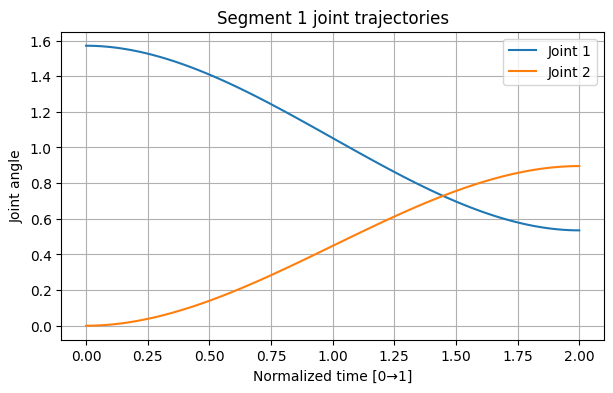

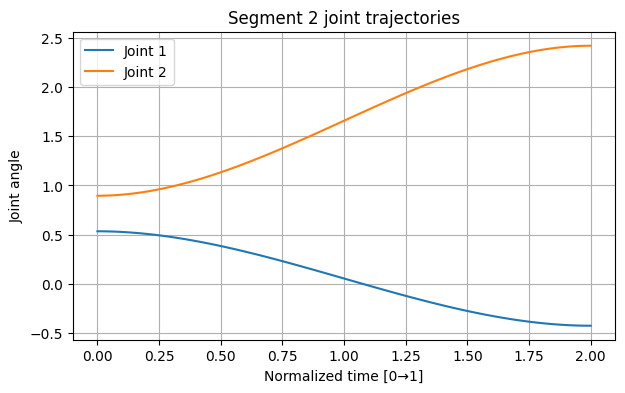

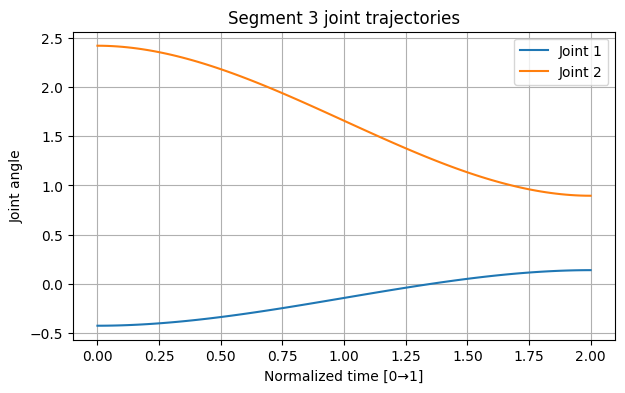

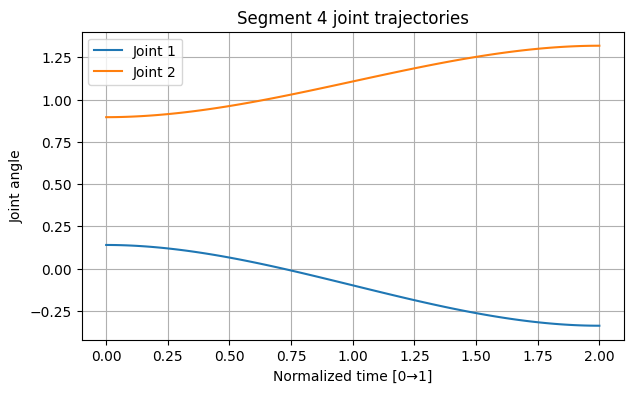

In [27]:
from matplotlib import pyplot as plt

# Plot the trajectory for x y both between 0 and 4
# Convert to numeric function for plotting

# Assume `trajectories` is a list of segments, each segment is a list of symbolic joint expressions
x = np.linspace(0, 2, 100)  # normalized time for each segment

for i, segment in enumerate(trajectories):
    plt.figure(figsize=(7, 4))
    for j, (joint_traj, joint_traj_derivative) in enumerate(segment):
        # Evaluate symbolic expression numerically
        y_vals = [float(joint_traj.subs({time_t: t_val})) for t_val in x]
        plt.plot(x, y_vals, label=f"Joint {j + 1}")

    plt.title(f"Segment {i + 1} joint trajectories")
    plt.xlabel("Normalized time [0→1]")
    plt.ylabel("Joint angle")
    plt.legend()
    plt.grid(True)
    plt.show()

2c)
 We should now merge the trajectories into one graph.

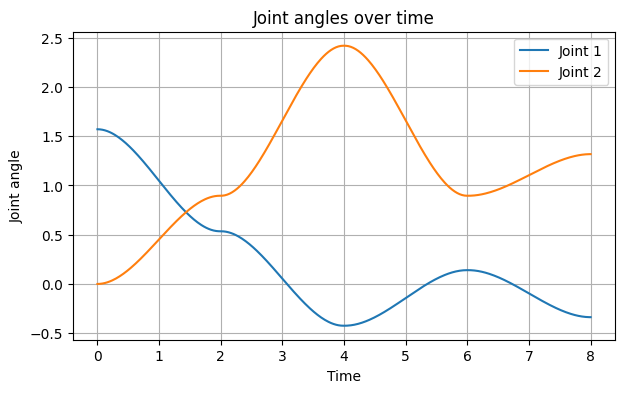

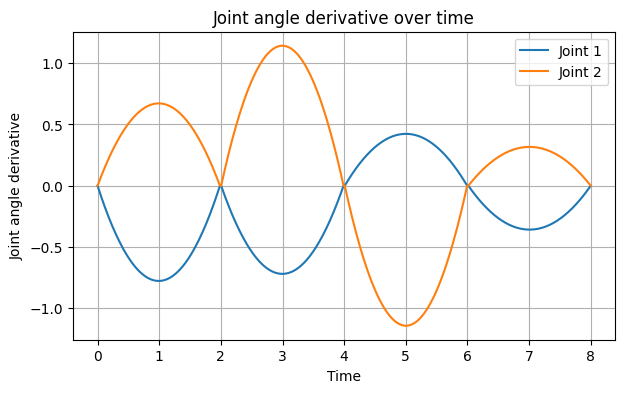

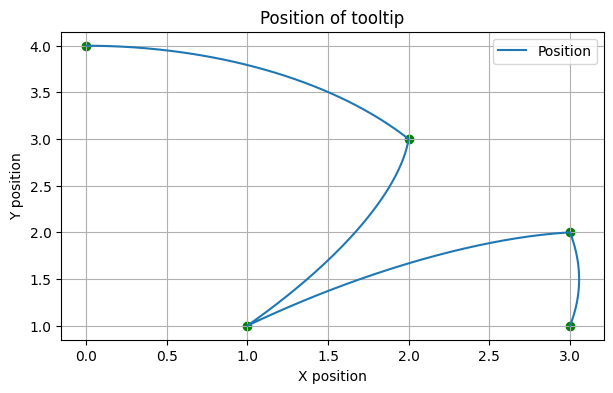

In [28]:
x_traj = np.linspace(0, 2, 100)

joint_ys = [[], []]
joint_ys_deriv = [[], []]
x_coordinate, y_coordinate = [], []

for i, segment in enumerate(trajectories):
    for j, (joint_traj, joint_traj_derivative) in enumerate(segment):
        # Evaluate symbolic expression numerically
        y_vals = [float(joint_traj.subs({time_t: t_val})) for t_val in x_traj]
        joint_ys[j].extend(y_vals)
        y_vals_deriv = [float(joint_traj_derivative.subs({time_t: t_val})) for t_val in x_traj]
        joint_ys_deriv[j].extend(y_vals_deriv)

x_coordinate.extend(
    [x4_forward.subs({theta1: _theta1, theta2: _theta2, a_1: 2, a_2: 2}) for _theta1, _theta2 in zip(*joint_ys)])
y_coordinate.extend(
    [y4_forward.subs({theta1: _theta1, theta2: _theta2, a_1: 2, a_2: 2}) for _theta1, _theta2 in zip(*joint_ys)])

plt.figure(figsize=(7, 4))
x = np.linspace(0, 2 * len(trajectories), 100 * len(trajectories))  # normalized time for each segment
for j, joint_y in enumerate(joint_ys):
    # Evaluate symbolic expression numerically
    plt.plot(x, joint_ys[j], label=f"Joint {j + 1}")
    plt.title(f"Joint angles over time")
    plt.xlabel("Time")
    plt.ylabel("Joint angle")
    plt.legend()
    plt.grid(True)
plt.show()
plt.figure(figsize=(7, 4))
for j, joint_y in enumerate(joint_ys_deriv):
    # Evaluate symbolic expression numerically
    plt.plot(x, joint_ys_deriv[j], label=f"Joint {j + 1}")
    plt.title(f"Joint angle derivative over time")
    plt.xlabel("Time")
    plt.ylabel("Joint angle derivative")
    plt.legend()
    plt.grid(True)
plt.show()
plt.figure(figsize=(7, 4))
plt.plot(x_coordinate, y_coordinate, label=f"Position")
# Also put dots for each of the goals

x_targets, y_targets = list(zip(*points.values()))

plt.scatter(x=x_targets, y=y_targets, c="green")

plt.title(f"Position of tooltip")
plt.xlabel("X position")
plt.ylabel("Y position")
plt.legend()
plt.grid(True)
plt.show()



4d)

Problems with applying the cubic trajectory could be that the robot requires more constraints
it may for example require that the angle derivative is below some threshold
we do also not account for any obstacles in the world.

Higher order polynomials such as the quintic polynomial would add a constraint for the jerk making the angle change less fast.
Disadvantages of higher order are that they are more difficult to implement and to calculate. They are also more sensitive to errors.
If using MoveJ like trajectories and not cartesian trajectories there will be issues if a straight path is needed such as in welding.

The trajectory generation could rather easily be extended to conserve the velocity by simply inputting the last velocity value from the past segment into the next segments first equation.

## Exercise 5

a)

In [30]:
import roboticstoolbox as rtb

robot = rtb.models.Panda()
print(robot)  # Check that everything works.


ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌──────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│ link │     link     │ joint │   parent    │              ETS: parent to link               │
├──────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│    0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│    1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│    2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│    3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│    4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│    5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│    6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0

In [31]:
from roboticstoolbox import RevoluteDH
import roboticstoolbox as rtb

lengths = [0.07, 0.36, 0.445]
masses = [45, 23, 30]  # kg
# I made up the masses from looking at the image of the robot and estimating roughly how much each link would weigh
# I knew that the sum of the masses should be 98 kg
robot = rtb.DHRobot(
    [  # Z axis is upwards
        RevoluteDH(d=0.352, alpha=-np.pi / 2, a=lengths[0], m=masses[0], r=[-lengths[0] * 0.5, 0, -0.352 * 0.5]),
        RevoluteDH(d=0, alpha=0, a=lengths[1], offset=-np.pi / 2, m=masses[1], r=[-lengths[1] * 0.5, 0, 0]),
        RevoluteDH(d=0, alpha=np.pi / 2, a=lengths[2], offset=np.pi / 2, m=masses[2], r=[-lengths[2] * 0.5, 0, 0]),
    ], name="Minimized ABB 140"
)

print(robot)

DHRobot: Minimized ABB 140, 3 joints (RRR), dynamics, standard DH parameters
┌───────────┬───────┬───────┬────────┐
│    θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │
├───────────┼───────┼───────┼────────┤
│  q1       │ 0.352 │  0.07 │ -90.0° │
│  q2 - 90° │     0 │  0.36 │   0.0° │
│  q3 + 90° │     0 │ 0.445 │  90.0° │
└───────────┴───────┴───────┴────────┘

┌──┬──┐
└──┴──┘



5b)

In [32]:
q_rad = np.deg2rad([0, 20, 30])
gravity = [0, 0, -9.81]
tau = robot.gravload(q_rad, gravity=gravity)
print(f"Joint torques: {tau}")  # Nm

Joint torques: [  0.         -92.21780859 -42.09085756]


In [33]:
gear_ratio = 100  # 100 turns servo is 1 turn joint
tau_servo = tau / 100
tau_servo  # The torque required for the servo in Nm

array([ 0.        , -0.92217809, -0.42090858])

5b)
Question:
        Mention some benefits why you in industrial robotics want to have a gear-box with a gear ratio providing
        significantly ‘higher speed on the motor-side than on the arm-side’ through the
        gearbox. Also comment on some drawback(s) with gear-boxes.

Answer:
    We want to have higher speed on the motor side than on the arm so that we can get higher torque on the arm side.
    This allows us to for example carry heavier loads etc. Having higher speed on the motor side also allows for more precise control as if the motor for example have 1 degree accuracy then after
    a 100:1 gearbox the arm will have 0.01 degree accuracy. A drawback with gear boxes is that they increase complexity, cost and take up more space.


5c)

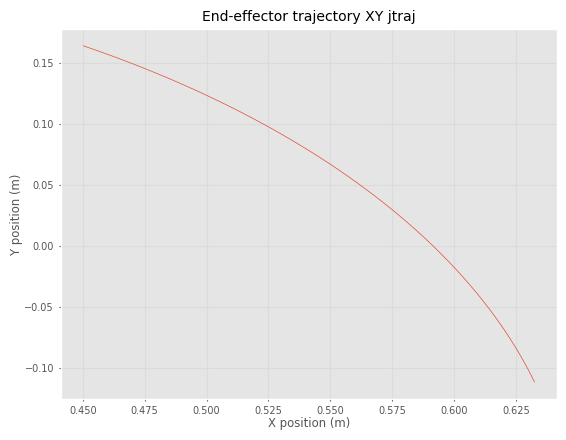

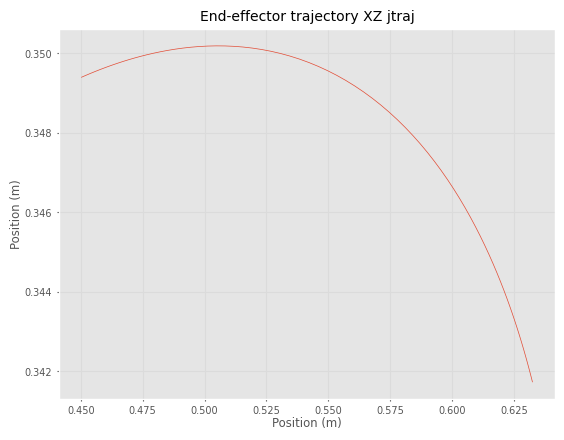

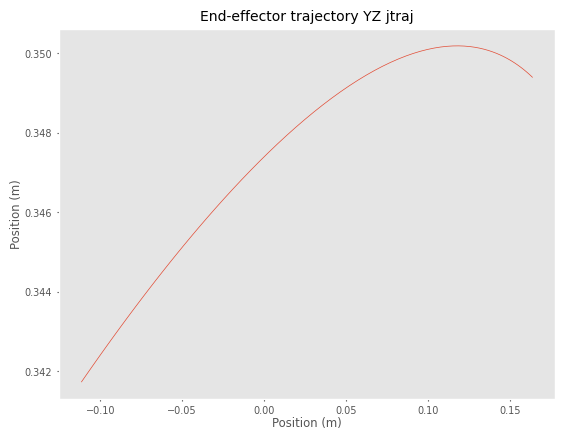

In [35]:
start = np.deg2rad([20, 20, 30])
end = np.deg2rad([-10, 40, 0])

traj = rtb.jtraj(start, end, 100)

points = [robot.fkine(q).t for q in traj.q]

plt.plot([p[0] for p in points], [p[1] for p in points], label="XY plane")
plt.title("End-effector trajectory XY jtraj")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.show()
plt.plot([p[0] for p in points], [p[2] for p in points], label="XZ plane")
plt.title("End-effector trajectory XZ jtraj")
plt.xlabel("Position (m)")
plt.ylabel("Position (m)")
plt.show()
plt.plot([p[1] for p in points], [p[2] for p in points], label="YZ plane")
plt.title("End-effector trajectory YZ jtraj")
plt.xlabel("Position (m)")
plt.ylabel("Position (m)")
plt.grid()
plt.show()



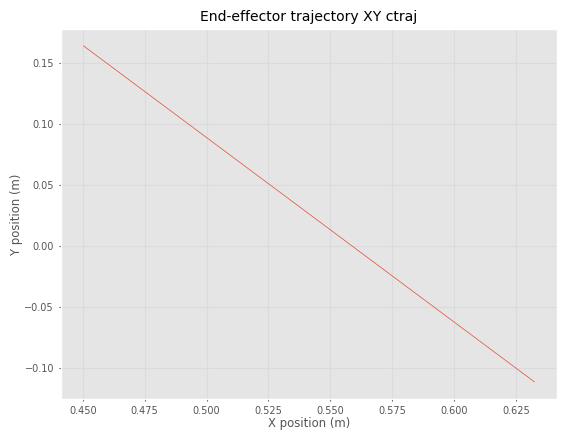

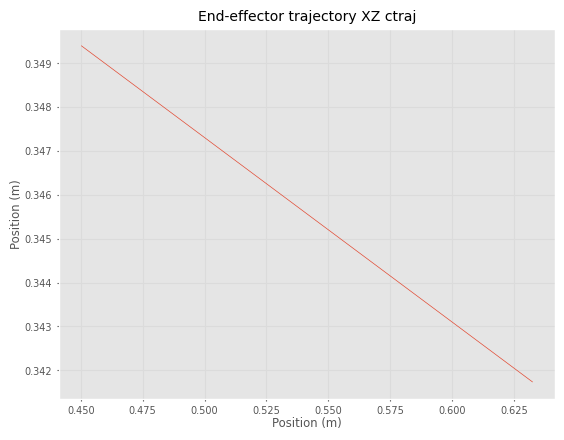

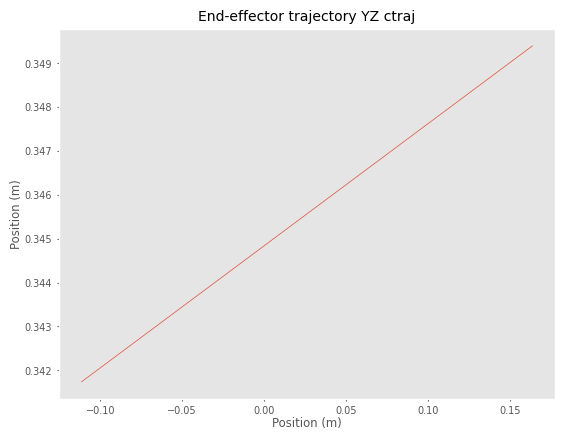

In [36]:
# Now linear motion
linear = rtb.ctraj(robot.fkine(start), robot.fkine(end), 100)
points = [p.t for p in linear]

plt.plot([p[0] for p in points], [p[1] for p in points], label="XY plane")
plt.title("End-effector trajectory XY ctraj")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.show()
plt.plot([p[0] for p in points], [p[2] for p in points], label="XZ plane")
plt.title("End-effector trajectory XZ ctraj")
plt.xlabel("Position (m)")
plt.ylabel("Position (m)")
plt.show()
plt.plot([p[1] for p in points], [p[2] for p in points], label="YZ plane")
plt.title("End-effector trajectory YZ ctraj")
plt.xlabel("Position (m)")
plt.ylabel("Position (m)")
plt.grid()
plt.show()

d) free falling

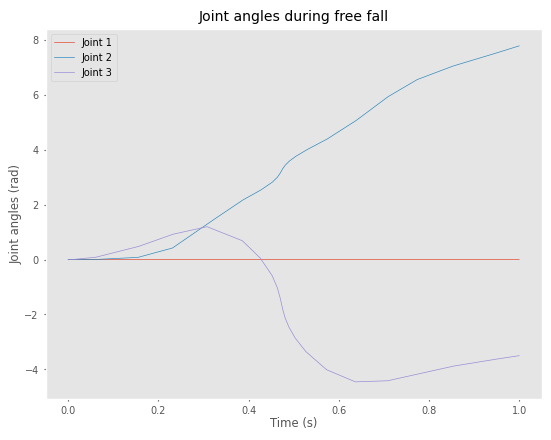

In [37]:
q0 = np.deg2rad([0, 0, 0])

jtrajectory = robot.fdyn(T=1, q0=q0, progress=False, dt=0.0001)

plt.plot(jtrajectory.t, jtrajectory.q, label=["Joint 1", "Joint 2", "Joint 3"])
plt.title("Joint angles during free fall")
plt.xlabel("Time (s)")
plt.ylabel("Joint angles (rad)")
plt.grid()
plt.legend()
plt.show()

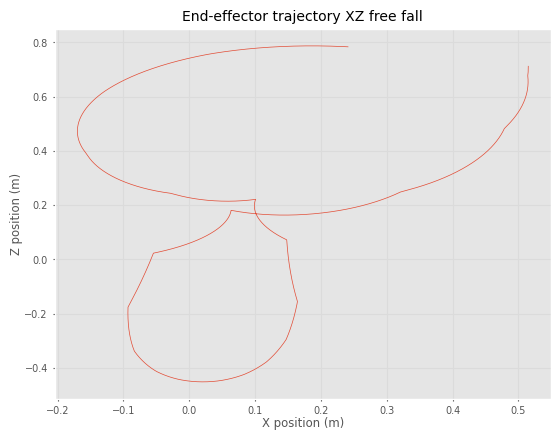

In [38]:
# Now plot in cartesian space, will only calculate end effector position
points = [robot.fkine(q).t for q in jtrajectory.q]

plt.plot([p[0] for p in points], [p[2] for p in points], label="XZ plane")
plt.title("End-effector trajectory XZ free fall")
plt.xlabel("X position (m)")
plt.ylabel("Z position (m)")
plt.show()

# XY, YZ will not be useful as we are not moving in the Y direction at all, it is always (almost) 0.
# XZ is however interesting as we can see the fall.
# The end effector falls down in a curve as the first joint also rotates during the fall
